In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models, layers, activations
from keras.layers import Conv2D, TimeDistributed, BatchNormalization, MaxPooling2D, Flatten, Bidirectional, Dense,Dropout,Flatten
from keras.callbacks import EarlyStopping

In [2]:
x_data = np.load('face_x_data.npy')
y_data = np.load('face_y_data.npy')
y_data = keras.utils.to_categorical(y_data,11)
print(x_data.shape, y_data.shape)

(3000, 27, 64, 64, 3) (3000, 11)


In [3]:
# Train과 Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)
print("x_train: {}, X_test: {}".format(X_train.shape, X_test.shape))
print("Y_train: {}, Y_test: {}".format(Y_train.shape, Y_test.shape))

x_train: (2400, 27, 64, 64, 3), X_test: (600, 27, 64, 64, 3)
Y_train: (2400, 11), Y_test: (600, 11)


In [4]:
class deep_CNN_LSTM(keras.Model):
    def __init__(self, num_classes):
        super(deep_CNN_LSTM, self).__init__()
        self.conv1 = TimeDistributed(Conv2D(64, kernel_size=(5,5), activation = 'relu'))
        self.conv2 = TimeDistributed(Conv2D(32, kernel_size=(5,5), activation = 'relu'))
        self.conv3 = TimeDistributed(Conv2D(64, kernel_size=(5,5), activation = 'relu'))
        
        self.bilstm = layers.Bidirectional(layers.LSTM(256), merge_mode = 'concat')
        self.dense = layers.Dense(num_classes, activation = 'softmax')
        self.max_pool= TimeDistributed(MaxPooling2D(pool_size= (2,2)))
        self.dropout = layers.Dropout(0.2)
        self.flat= TimeDistributed(Flatten())
        
    def call(self, x):
        x = self.conv1(x)
        x = TimeDistributed(MaxPooling2D(pool_size= (2,2)))(x)
        x = self.dropout(x)
        x = BatchNormalization()(x)
        x = self.conv2(x)
        x = TimeDistributed(MaxPooling2D(pool_size= (2,2)))(x)
        x = self.dropout(x)
        x = BatchNormalization()(x)
        x = self.conv3(x)
        x = TimeDistributed(MaxPooling2D(pool_size= (2,2)))(x)
        x = self.dropout(x)
        x = BatchNormalization()(x)
        x = self.flat(x)
        x = self.bilstm(x)
        x = self.dense(x)
        return x

In [5]:
def get_model():
    return deep_CNN_LSTM(num_classes = 11)

In [6]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [7]:
model = get_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose = 1, validation_data = (X_test, Y_test),callbacks = [es])

C:\Users\owner\anaconda3\envs\Lip\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
75/75 [==============================] - 724s 10s/step - loss: 2.3209 - accuracy: 0.1096 - val_loss: 2.2714 - val_accuracy: 0.1367
Epoch 2/100
75/75 [==============================] - 1811s 24s/step - loss: 2.2769 - accuracy: 0.1238 - val_loss: 2.2654 - val_accuracy: 0.1250
Epoch 3/100
75/75 [==============================] - 516s 7s/step - loss: 2.2593 - accuracy: 0.1554 - val_loss: 2.2498 - val_accuracy: 0.1450
Epoch 4/100
75/75 [==============================] - 522s 7s/step - loss: 2.2556 - accuracy: 0.1346 - val_loss: 2.2324 - val_accuracy: 0.1633
Epoch 5/100
75/75 [==============================] - 526s 7s/step - loss: 2.2539 - accuracy: 0.1338 - val_loss: 2.2969 - val_accuracy: 0.1150
Epoch 6/100
75/75 [==============================] - 533s 7s/step - loss: 2.3032 - accuracy: 0.1108 - val_loss: 2.2704 - val_accuracy: 0.1433
Epoch 7/100
75/75 [==============================] - 536s 7s/step - loss: 2.2650 - accuracy: 0.1350 - val_loss: 2.2522 - val_accuracy: 0.1517
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


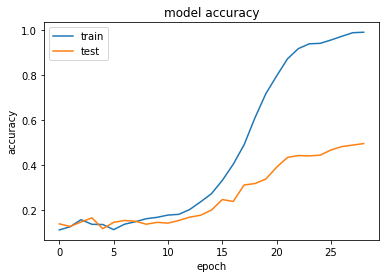

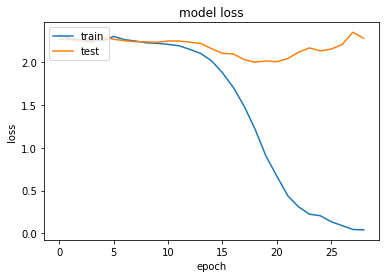

In [8]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

19/19 [==============================] - 35s 2s/step - loss: 2.2810 - accuracy: 0.4950
## evaluation loss and_metrics ##
[2.281034231185913, 0.4950000047683716]


In [14]:
score = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
print("acc:", score[1], "loss:", score[0])

19/19 [==============================] - 35s 2s/step - loss: 2.2810 - accuracy: 0.4950
acc: 0.4950000047683716 loss: 2.281034231185913


In [19]:
model.save_weights('deep_cnn_bilstm.h5')

In [16]:
model.load_weights('deep_cnn_bilstm.h5')

In [22]:
import json
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import numpy
import pandas as pd